# Exploratory analysis of the ATLAS RPV image data

In [27]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import

In [28]:
# Temporary fudge for python path
import sys
sys.path.append('..')

In [29]:
# System imports
import os

# External imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Local imports
from atlasgan import reco

# Magics
%matplotlib notebook

## Utilities

In [30]:
def draw_image(x, vmin=None, vmax=None, xlabel='$\eta$', ylabel='$\phi$',
               draw_cbar=True, ax=None, figsize=(5,4), **kwargs):
    if ax is None:
        _, ax = plt.subplots(figsize=figsize)
    cax = ax.imshow(x.T, extent=[-2.5, 2.5, -3.15, 3.15],
                    norm=LogNorm(vmin, vmax), aspect='auto',
                    origin='lower', **kwargs)
    if draw_cbar:
        cbar = plt.gcf().colorbar(cax, ax=ax)
        cbar.set_label('Normalized Energy')
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)

## Load the data

In [31]:
input_file = '/data0/sfarrell/atlas_rpv_data/RPV10_1600_250_01.npz'

In [32]:
n_samples = 2**14

In [33]:
with np.load(input_file) as f:
    hist = f['hist'][:n_samples].copy()

In [34]:
hist.shape

(16384, 64, 64)

## Show some sample images

<IPython.core.display.Javascript object>


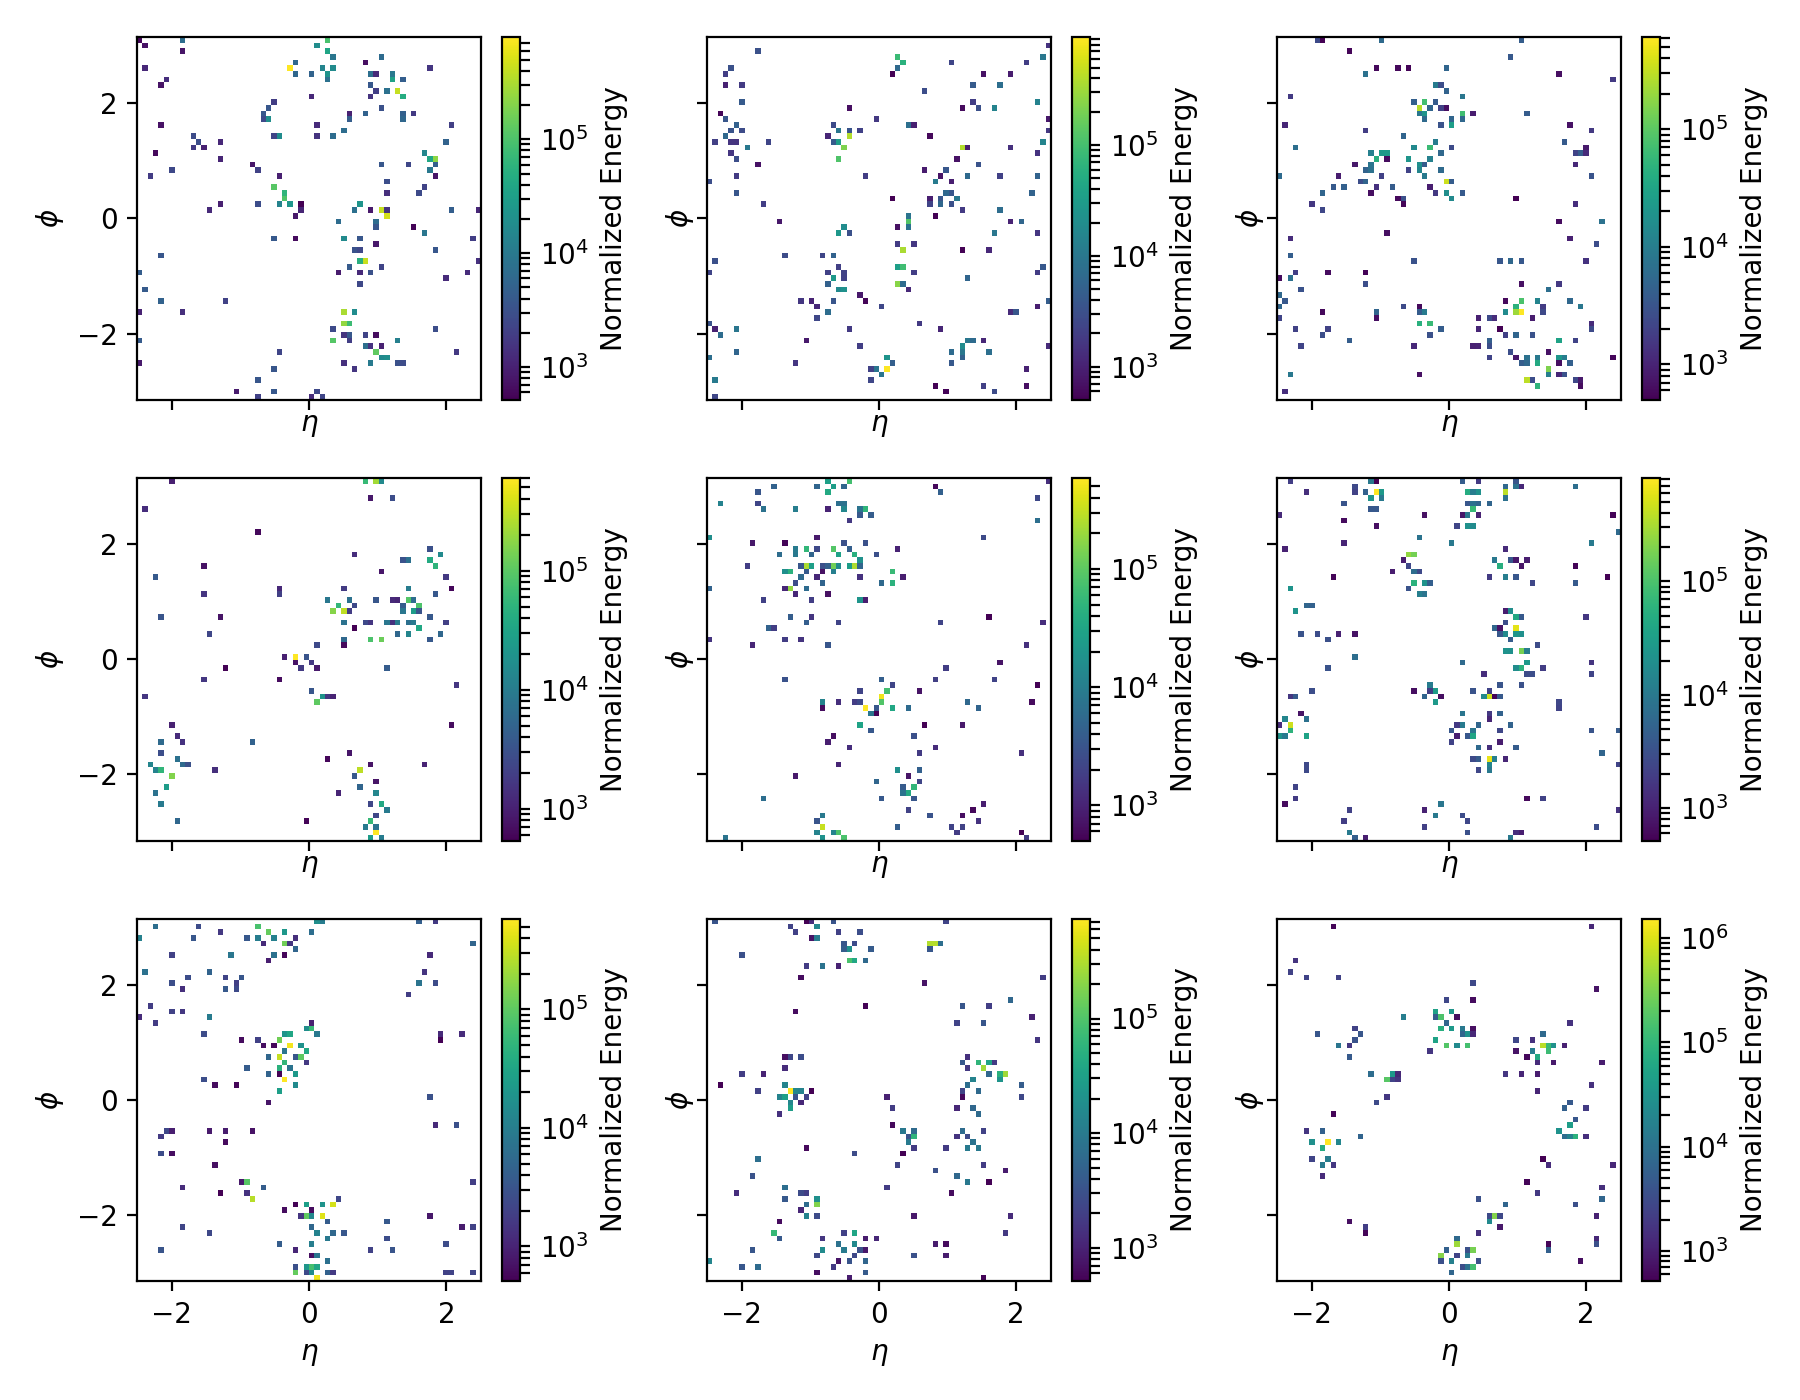

In [35]:
fig, axs = plt.subplots(3, 3, figsize=(9,7), sharex=True, sharey=True)
axs = axs.flatten()

for i, ax in enumerate(axs):
    draw_image(hist[i], ax=ax)

plt.tight_layout()

## Basic plots

### Pixel intensity (energy spectrum)

In [36]:
pixels = hist.flatten()
nonzero = (pixels > 0)

<IPython.core.display.Javascript object>


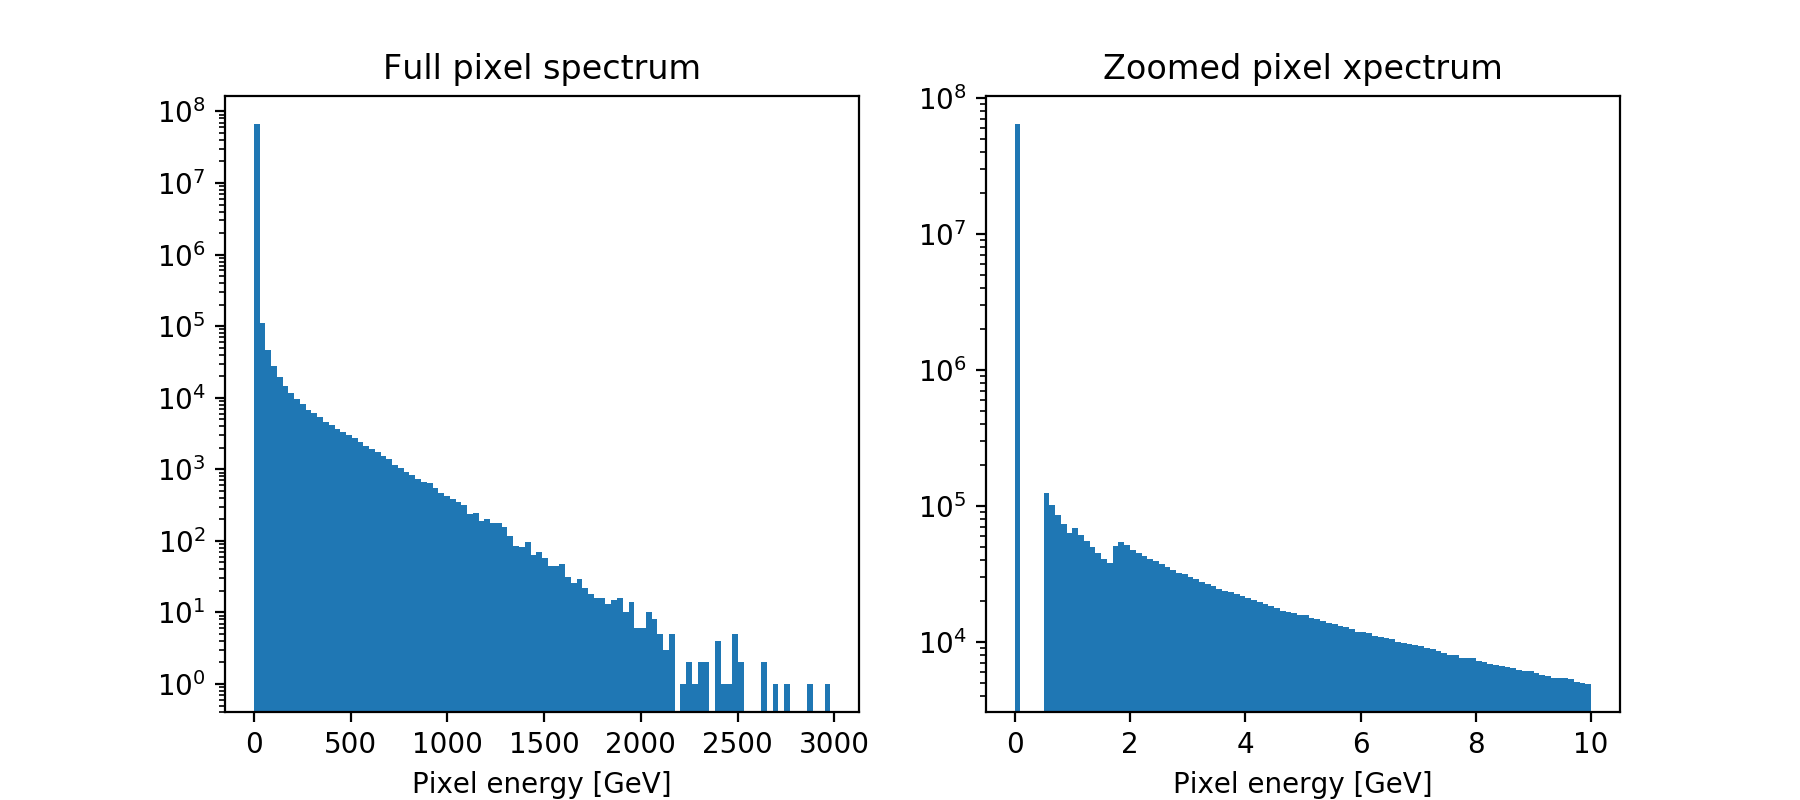

Text(0.5,1,'Zoomed pixel xpectrum')

In [37]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(9,4))

ax0.hist(pixels/1e3, log=True, bins=100)
ax0.set_xlabel('Pixel energy [GeV]')
ax0.set_title('Full pixel spectrum')

ax1.hist(pixels/1e3, log=True, bins=100, range=(0, 10))
ax1.set_xlabel('Pixel energy [GeV]')
ax1.set_title('Zoomed pixel xpectrum')

## Apply reconstruction

In [50]:
jets = reco.reconstruct_events(hist[0:1]/1e6)

In [51]:
jets.pt

0    6.070691e+06
1    5.511404e+06
2    4.847406e+06
3    1.870162e+06
4    1.791189e+06
5    6.035790e+05
6    3.202602e+05
Name: pt, dtype: float64

In [43]:
reco.reconstruct_events??

## Physics plots